In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [3]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
from sklearn.model_selection import train_test_split

X = df.drop("target", axis = 1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=101)

              precision    recall  f1-score   support

           0       0.82      0.92      0.87        39
           1       0.94      0.85      0.89        52

    accuracy                           0.88        91
   macro avg       0.88      0.88      0.88        91
weighted avg       0.89      0.88      0.88        91



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


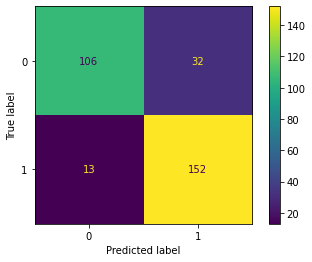

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, plot_confusion_matrix

log = LogisticRegression()

log.fit(X_train,y_train)
preds = log.predict(X_test)
print(classification_report(preds,y_test))
# print(log.predict_proba(X_test))
print(plot_confusion_matrix(log,X,y))

In [18]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

dtc.fit(X_train,y_train)
preds = dtc.predict(X_test)

print(classification_report(preds,y_test))

# Real Bad Model

              precision    recall  f1-score   support

           0       0.66      0.88      0.75        33
           1       0.91      0.74      0.82        58

    accuracy                           0.79        91
   macro avg       0.79      0.81      0.79        91
weighted avg       0.82      0.79      0.80        91



In [29]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

rfc.fit(X_train,y_train)
preds = rfc.predict(X_test)

print(classification_report(preds,y_test))

rfc.predict_proba(X_test)

              precision    recall  f1-score   support

           0       0.80      0.85      0.82        41
           1       0.87      0.82      0.85        50

    accuracy                           0.84        91
   macro avg       0.83      0.84      0.83        91
weighted avg       0.84      0.84      0.84        91



array([[0.88, 0.12],
       [0.11, 0.89],
       [0.23, 0.77],
       [0.06, 0.94],
       [0.99, 0.01],
       [0.05, 0.95],
       [0.23, 0.77],
       [0.92, 0.08],
       [0.89, 0.11],
       [0.38, 0.62],
       [0.94, 0.06],
       [0.09, 0.91],
       [0.86, 0.14],
       [0.48, 0.52],
       [0.47, 0.53],
       [0.04, 0.96],
       [0.3 , 0.7 ],
       [0.37, 0.63],
       [0.08, 0.92],
       [0.92, 0.08],
       [0.87, 0.13],
       [0.4 , 0.6 ],
       [0.53, 0.47],
       [0.36, 0.64],
       [0.62, 0.38],
       [0.07, 0.93],
       [0.97, 0.03],
       [0.32, 0.68],
       [0.97, 0.03],
       [0.61, 0.39],
       [0.96, 0.04],
       [0.55, 0.45],
       [0.83, 0.17],
       [0.31, 0.69],
       [0.06, 0.94],
       [0.3 , 0.7 ],
       [0.03, 0.97],
       [0.29, 0.71],
       [0.12, 0.88],
       [0.01, 0.99],
       [0.56, 0.44],
       [0.  , 1.  ],
       [0.23, 0.77],
       [0.49, 0.51],
       [0.75, 0.25],
       [0.21, 0.79],
       [0.74, 0.26],
       [0.02,

# Logistic Regression is much better

In [23]:
import joblib
joblib.dump(log,"heart_log.pkl")

['heart_log.pkl']

In [25]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [27]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000
